# Laboratorio 1

Alberto Zae Cortes Y Julian David Ardila Rodriguez

## Introducción

En la acústica ambiental antes de hablar de los tipos de ruido, se define el ruido como un sonido indeseado que genera efectos negativos en los seres vivos. Ahora al hablar de ruido se tienen que pensar en sus características primarias. La distribución de intensidades en ciertos tipos de frecuencias le dan la definición al mismo. Por ejemplo, un ruido con alta intensidad en frecuencias bajas, es un ruido de baja frecuencia. También está el ruido tonal, donde existe una diferencia en decibeles de una frecuencia específica de más de 5 dB con respecto a frecuencias aledañas. También está el ruido continuo en un tiempo determinado que tiene variaciones pequeñas, pero en el tiempo es generalmente constante. Hay ruidos intermitentes o que varía por ciclos de tiempo. Y finalmente está el ruido impulsivo que tiene una alta intensidad y corta duración que decae en el tiempo. En este laboratorio se habla del nivel continuo equivalente que promedia los niveles de presión sonora ocurridos en un instante de tiempo determinado y también se determinará la sumatoria de intensidades como el nivel de presión sonora que cuantifica la cantidad total de energía acústica ponderada en un intervalo de tiempo de un evento acústico.



## Punto 1

### Dependencias

In [2]:
!pip install matplotlib

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [3]:
import sys  
!{sys.executable} -m pip install pandas

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import json
import math
import pandas
from IPython.display import display, Markdown
from matplotlib.ticker import ScalarFormatter

### Acciones


#### Media Aritmetica
<math>
    \begin{align}
    \bar{x} = \frac{1}{n} \sum_{i=1}^n{x_i}\\
    \end{align}
</math>

#### Moda

Dato más repetido

#### Mediana
Si N es par
<math>
    \begin{align}
    X \frac{N + 1}{2} 
    \end{align}
</math>
Si N es impar
<math>
    \begin{align}
    \frac{1}{2} \left(X_{\frac{N}{2}} + X_{\frac{N}{2} + 1}\right)
    \end{align}
</math>

#### Varianza

<math>
    \begin{align}
    \sigma^2 = \frac 1n \sum_{i=1}^n \left(x_i - \overline{X} \right)^ 2
    \end{align}
</math>

#### Desviación estandar

<math>
    \begin{align}
    \sigma= \sqrt{\frac 1n \sum_{i=1}^n \left(x_i - \overline{X} \right)^ 2}
    \end{align}
</math>

In [5]:
def media(data):
    return sum(data)/len(data)

def moda(data):
    cont = {}
    aux = 0
    for n in data:
        if str(n) in cont:
            cont[str(n)] += 1
        else:
            cont[str(n)] = 0
        if cont[str(n)] > aux:
            aux = cont[str(n)]
    result = [ float(key) for key, value in cont.items() if value >= aux]
    return sum(result)/len(result)

def mediana(data):
    data.sort()
    N = len(data)
    aux = N/2
    if N%2 == 0:
        return (data[int(aux)] + data[int(aux+1)])/2
    else:
        return data[int(aux)]
    
def des_standar_or_varianza(data, media, var = True):
    N = len(data)
    result = sum([ (n - media)**2 for n in data ])/N
    if var:
        return result
    return result**(1/2)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


Para las dos ponderaciones, la primera ecuación nos va a brindar la amplitud del espectro y no la intensidad, por lo que nos toca aplicar la segunda ecuación y obtener ese valor. Y se normaliza ese valor a 0db con 100 Hz.

#### Ponderación A

:<math>\begin{align}
  R_A(f) &= {12194^2 f^4 \over \left(f^2 + 20.6^2\right)\ \sqrt{\left(f^2 + 107.7^2\right)\left(f^2 + 737.9^2\right)}\ \left(f^2 + 12194^2\right)}\ ,\\[3pt]
    A(f) &= 20\log_{10}\left(R_A(f)\right) - 20\log_{10}\left(R_A(1000)\right) \\
\end{align}</math><ref name="IEC61672" />


#### Ponderación C

:<math>\begin{align}
  R_C(f) &= {12194^2 f^2 \over \left(f^2 + 20.6^2\right)\ \left(f^2 + 12194^2\right)}\ ,\\[3pt]
    C(f) &= 20\log_{10}\left(R_C(f)\right) - 20\log_{10}\left(R_C(1000)\right) \\[3pt]
\end{align}</math><ref name="IEC61672" />


In [6]:
        
def ponderacion(f,tipo = "A"):
    if tipo == "A":
        return 12194**2 * f**4/((f**2 + 20.6**2) * math.sqrt((f**2 + 107.7**2)*(f**2 + 737.9**2)) * (f**2 + 12194**2))
    elif tipo == "B":
        return 12194**2 * f**3/((f**2 + 20.6**2) * math.sqrt(f**2 + 158.5**2) * (f**2 + 12194**2))
    return 12194**2 * f**2 / ((f**2 + 20.6**2) * (f**2 + 12194**2))
    
    
def ponderacion_dB(f, tipo = "A"):
    if tipo in ["A", "B", "C"]:
        return 20 * math.log10(ponderacion(f,tipo)) - 20 * math.log10(ponderacion(1000,tipo))
    return 0


### Importación de los datos y procesamiento

Se creo un JSON con el cual se realizara los debidos porcesos para el siguienete paso al crear las tablas.


In [7]:
file = json.load(open('data.json'))
data = file['Punto1']
x = []
dB_Lin = []
dBA = []
dBC = []
for n in data:
    x.append(int(n['time']))
    dB_Lin.append(float(n['dB Lin']))
    dBA.append(float(n['dBA']))
    dBC.append(float(n['dBC']))

In [8]:
display(Markdown('#### Tabla de Datos en el JSON'))
print(pandas.json_normalize(data))

#### Tabla de Datos en el JSON

   time dB Lin   dBA   dBC
0     1   56.9  49.6  56.2
1     2   56.2  48.2  55.2
2     3   56.1  46.3  55.1
3     4   58.4  52.5  57.8
4     5   56.6  48.2  55.9
5     6     55  44.9    54
6     7   55.4    46  54.3
7     8   56.5  46.8  55.3
8     9   69.2  63.1  68.3
9    10   56.8  47.4  55.8
10   11   65.8  62.3  64.7
11   12   64.8  59.8  63.8
12   13   56.6    47  55.7
13   14   64.7  58.3  63.5
14   15   62.7  54.1  61.6
15   16   62.7    56  61.5
16   17     59  50.3  58.1
17   18   58.4  49.7  57.6
18   19   57.5  49.5  56.7
19   20   58.3  50.3  57.5
20   21   56.2  47.8  55.3
21   22   55.4  47.9  54.4
22   23   54.9    47  53.8
23   24   56.9  48.1    56
24   25   56.7  47.3  55.4
25   26   57.9  47.7  55.7
26   27   55.9  47.6  54.9
27   28   56.8  50.1  55.7
28   29   56.4  49.6  55.6
29   30   56.1  48.5  55.1


### Ecuación nivel continuo equivalente
$$
\mathtt{L}_{eq} =10 \log\left({\frac{1}{\mathtt{T}} \sum_{i=0}^\infty \mathtt{t}_i 10^{\frac{\mathtt{L}_{pi}}{10}}}\right) \\\ 
$$

Se calculara para cada medicón de nuestra tabla, con la anterior ecuación el nivel conttinuo equivalente

In [9]:
Leq = 10 * math.log10(sum([ pow(10,float(i['dB Lin'])/10) for i in data])/max(x))
display(Markdown('$$ \\mathtt{L}_{eq} =10 \\log\\left({\\frac{1}{\\mathtt{T}} \\sum_{i=0}^\\infty \\mathtt{t}_i 10^{\\frac{\\mathtt{L}_{pi}}{10}}}\\right) = {'+str(Leq)+ '} $$'))

$$ \mathtt{L}_{eq} =10 \log\left({\frac{1}{\mathtt{T}} \sum_{i=0}^\infty \mathtt{t}_i 10^{\frac{\mathtt{L}_{pi}}{10}}}\right) = {60.46704270151846} $$

In [10]:
LeqA = 10 * math.log10(sum([ pow(10,float(i['dBA'])/10) for i in data])/max(x))
display(Markdown('$$ \\mathtt{L}_{eqA} =10 \\log\\left({\\frac{1}{\\mathtt{T}} \\sum_{i=0}^\\infty \\mathtt{t}_i 10^{\\frac{\\mathtt{L}_{pi}}{10}}}\\right) = {'+str(LeqA)+ '} $$'))

$$ \mathtt{L}_{eqA} =10 \log\left({\frac{1}{\mathtt{T}} \sum_{i=0}^\infty \mathtt{t}_i 10^{\frac{\mathtt{L}_{pi}}{10}}}\right) = {54.128238226888485} $$

In [11]:
LeqC = 10 * math.log10(sum([ pow(10,float(i['dBC'])/10) for i in data])/max(x))
display(Markdown('$$ \\mathtt{L}_{eqC} =10 \\log\\left({\\frac{1}{\\mathtt{T}} \\sum_{i=0}^\\infty \\mathtt{t}_i 10^{\\frac{\\mathtt{L}_{pi}}{10}}}\\right) = {'+str(LeqC)+ '} $$'))

$$ \mathtt{L}_{eqC} =10 \log\left({\frac{1}{\mathtt{T}} \sum_{i=0}^\infty \mathtt{t}_i 10^{\frac{\mathtt{L}_{pi}}{10}}}\right) = {59.456428069357145} $$

Se Creara la tabla intencidad espectral vs tiempo.

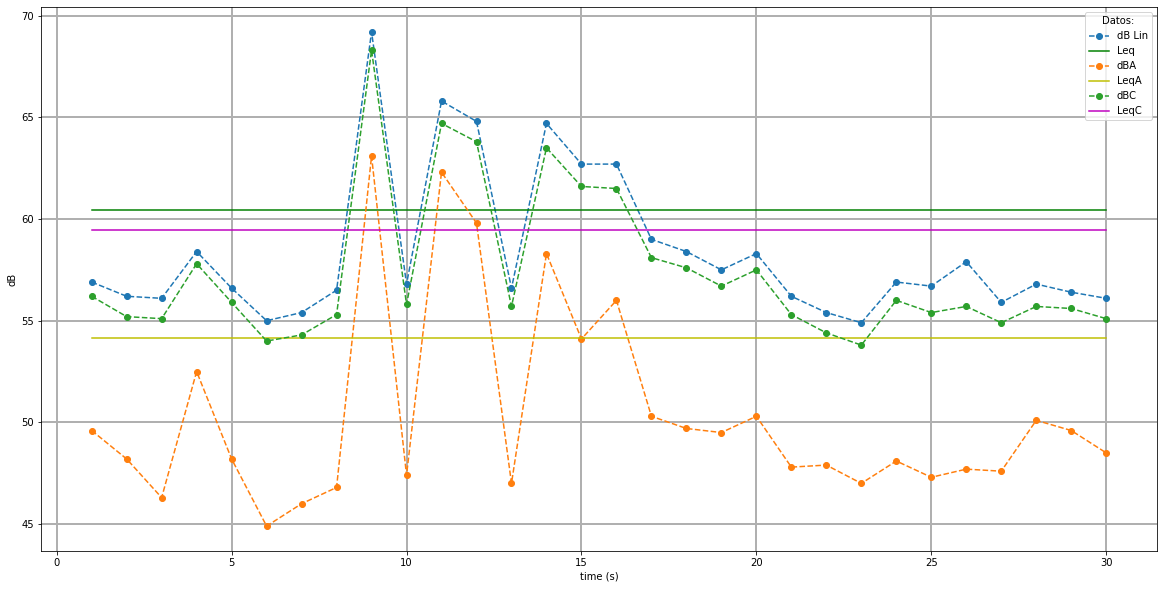

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
ax.plot(x, dB_Lin, 'o--', label='dB Lin')
ax.plot(x, [ Leq for n in x ], 'g', label='Leq')
ax.plot(x, dBA, 'o--', label="dBA")
ax.plot(x, [ LeqA for n in x ], 'y', label='LeqA')
ax.plot(x, dBC, 'o--', label="dBC")
ax.plot(x, [ LeqC for n in x ], 'm', label='LeqC')
ax.grid(linestyle='-', linewidth=2)
ax.legend(title='Datos:')
ax.set_xlabel('time (s)')
ax.set_ylabel('dB')
plt.show()

Se puede detallar que el tiempo es continuo y la difenerencia entre cada uno va ser 1 segundo,
por lo tanto en la ecuación de nivel continuo equivalente (Discreto), se omititra el tiempo de cada punto. Tambien se denota una similitud de cada tipo de dato graficado, con un cambios en la intensidad en el espectro. Lo que nos da a entender que todos los datos medidos son de la misma fuente en diferentes posiciones, pero a la misma distancia al no haber latencia.
Y se detalla que en la medición dBA da como resultado una atenuación de la intencidad del espectro.

También se pude observar que tiene una caracteristica de ruido impulsivo, con una caida intermedia, donde tiene un tiempo de decaimiento a su punto nominal. No se puede afirmar que es un ruido intermetente al ser una muestra muy corta, de apenas 30 segundos.

### Media, Moda, Mediana, Varianza y Desviación estandar

Se calculara los items mensinados para cada variable.

In [13]:
display(Markdown('#### dB Lineal '))
dB_Lin_media =  media(dB_Lin)
display(Markdown('Media :'+str(dB_Lin_media)))
dB_Lin_moda =  moda(dB_Lin)
display(Markdown('Moda :'+str(dB_Lin_moda)))
dB_Lin_mediana =  mediana(dB_Lin)
display(Markdown('Mediana :'+str(dB_Lin_mediana)))
display(Markdown('Varianza: $$ σ^2 = ' + str(des_standar_or_varianza(dB_Lin, dB_Lin_media)) + ' $$'))
display(Markdown('Desviación estándar:  $$ σ = ' + str(des_standar_or_varianza(dB_Lin, dB_Lin_media,var=False)) + ' $$'))

#### dB Lineal 

Media :58.360000000000014

Moda :57.387499999999996

Mediana :56.849999999999994

Varianza: $$ σ^2 = 12.844400000000004 $$

Desviación estándar:  $$ σ = 3.5839084809743684 $$

In [14]:
display(Markdown('#### dBA '))
dBA_media =  media(dBA)
display(Markdown('Media :'+str(dBA_media)))
dBA_moda =  moda(dBA)
display(Markdown('Moda :'+str(dBA_moda)))
dBA_mediana =  mediana(dBA)
display(Markdown('Mediana :'+str(dBA_mediana)))
display(Markdown('Varianza: $$ σ^2 = ' + str(des_standar_or_varianza(dBA, dBA_media)) + ' $$'))
display(Markdown('Desviación estándar:  $$ σ = ' + str(des_standar_or_varianza(dBA, dBA_media,var=False)) + ' $$'))

#### dBA 

Media :50.396666666666654

Moda :48.775000000000006

Mediana :49.0

Varianza: $$ σ^2 = 22.454988888888884 $$

Desviación estándar:  $$ σ = 4.738669527292327 $$

In [15]:
display(Markdown('#### dBC '))
dBC_media =  media(dBC)
display(Markdown('Media :'+str(dBC_media)))
dBC_moda =  moda(dBC)
display(Markdown('Moda :'+str(dBC_moda)))
dBC_mediana =  mediana(dBC)
display(Markdown('Mediana :'+str(dBC_mediana)))
display(Markdown('Varianza: $$ σ^2 = ' + str(des_standar_or_varianza(dBC, dBC_media)) + ' $$'))
display(Markdown('Desviación estándar:  $$ σ = ' + str(des_standar_or_varianza(dBC, dBC_media,var=False)) + ' $$'))

#### dBC 

Media :57.35000000000001

Moda :55.7

Mediana :55.849999999999994

Varianza: $$ σ^2 = 12.785833333333333 $$

Desviación estándar:  $$ σ = 3.5757283640306534 $$

Como lo pudimos notar en la anterior grafica, la diferencia de intencidad del espectro, con los calculos anteriores, mostrando el realce de los espectros Lin y C. <br><br>
En cuanto a la varianza y la desviacón estandar, se puede detallar que al no estar los valor cerca a 0, hay bastante variación en los datos, confirmando que se podria tratar de un ruido impulsivo.<br><br>
Pero en la posición A se pude ver que los datos tienden a bajar un poco esa variación.

### Histograma y Caja-Bigotes

Se realizara los graficos para los datos procesados.

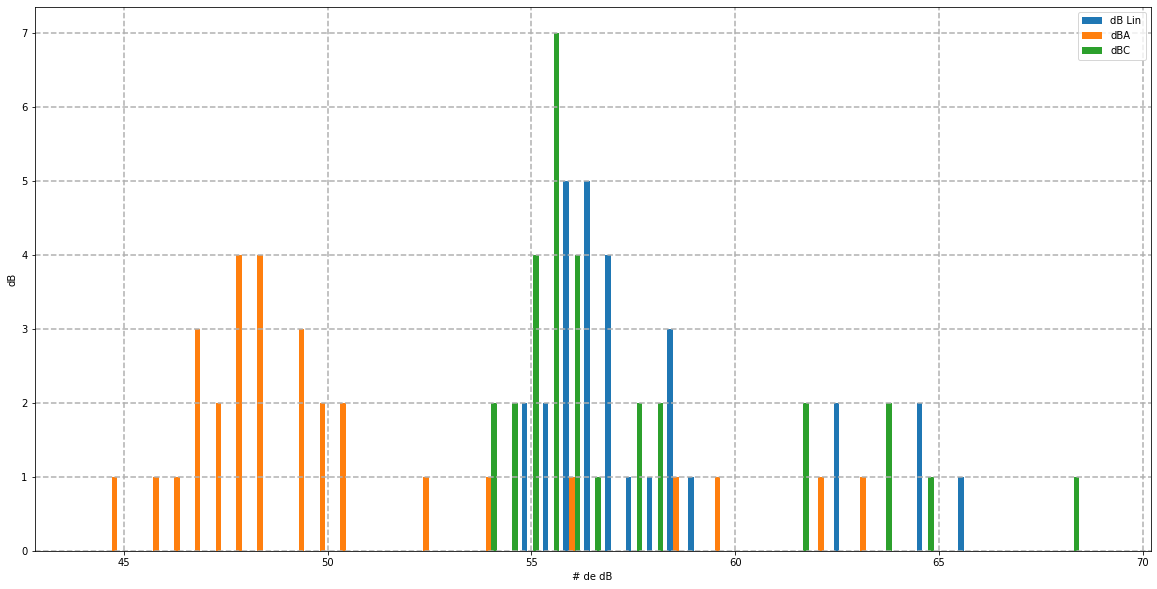

In [16]:
aux = dB_Lin + dBA + dBC
minimo = int(min(aux))
maximo = int(max(aux))
bins = np.linspace(minimo, maximo)

fig, ax = plt.subplots()
fig.set_size_inches(20,10)
ax.hist([dB_Lin, dBA, dBC], bins, label=["dB Lin", "dBA", "dBC"])

ax.grid(linestyle='--', linewidth=1.5)
ax.legend(loc='upper right')
ax.set_xlabel('# de dB')
ax.set_ylabel('dB')
plt.show()

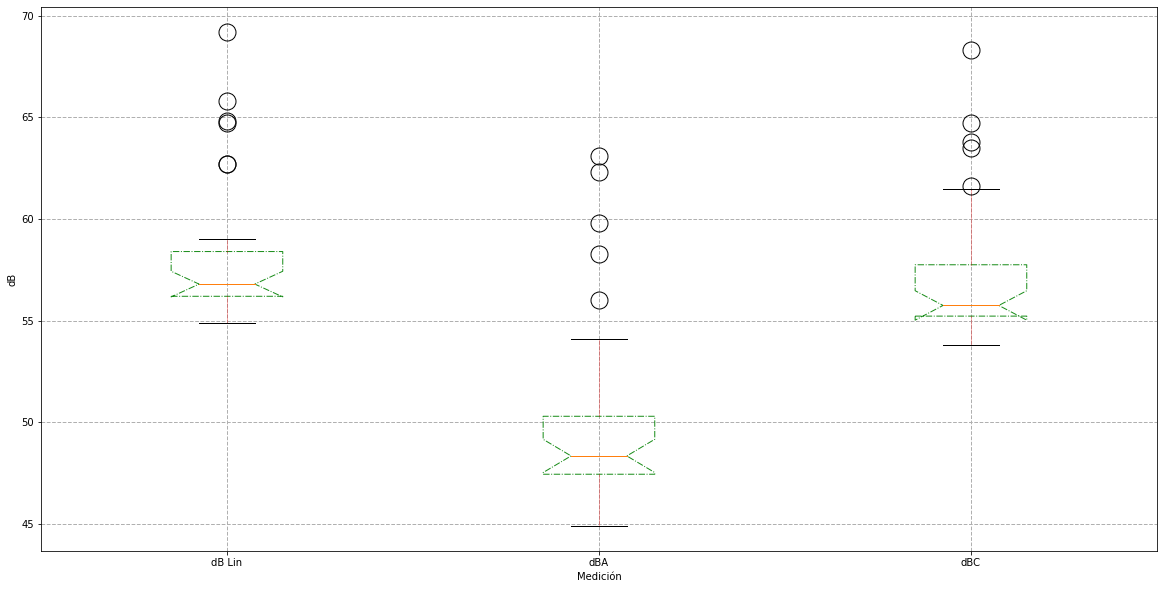

In [17]:
line_props = dict(color="r", alpha=0.3)
bbox_props = dict(color="g", alpha=0.9, linestyle="dashdot")
flier_props = dict(marker="o", markersize=17)
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
ax.boxplot((dB_Lin, dBA, dBC), 
    labels=["dB Lin", "dBA", "dBC"], 
    sym="o", 
    notch=True, 
    whiskerprops=line_props, 
    boxprops=bbox_props, 
    flierprops=flier_props
)
ax.grid(linestyle='--', linewidth=1)
ax.set_ylabel('dB')
ax.set_xlabel('Medición')
plt.show()

Comporando las dos anteriores tablas se detalla un rango corto, donde hay datos alejados de la media o la moda, confirmando mas lo que se ha venido diciendo anteriormente, al detallar que hay pocos datos que se realsan sobre el rango aumentando la varianza y por ende la deviación estandar. Esto muestra que hay picos en todas las mediciones, pero con la medicón dBA siendo la inferior.

# Punto 2

In [18]:
data2 = file['Punto2']

f = []
Oct_Leq = []
for n in data2:
    f.append(float(n['Freuencia']))
    Oct_Leq.append(float(n['1/3 Oct Leq']))

In [19]:
display(Markdown('#### Tabla de Datos en el JSON'))
print(pandas.json_normalize(data2))

#### Tabla de Datos en el JSON

   Freuencia 1/3 Oct Leq
0         25        45.8
1       31.5        46.2
2         40        48.7
3         50        51.6
4         63          50
5         80        49.4
6        100        47.2
7        125        48.3
8        160        47.6
9        200        49.1
10       250        46.9
11       315        44.7
12       400        44.1
13       500        45.3
14       630        43.3
15       800        41.1
16      1000        38.6
17      1250        37.2
18      1600        38.2
19      2000          40
20      2500        42.4
21      3150        48.4
22      4000          42
23      5000        37.4
24      6300        37.9
25      8000        37.8
26     10000        38.4
27     12500        37.9
28     16000        38.3
29     20000        40.4


## Intencidad Vs Frequencia



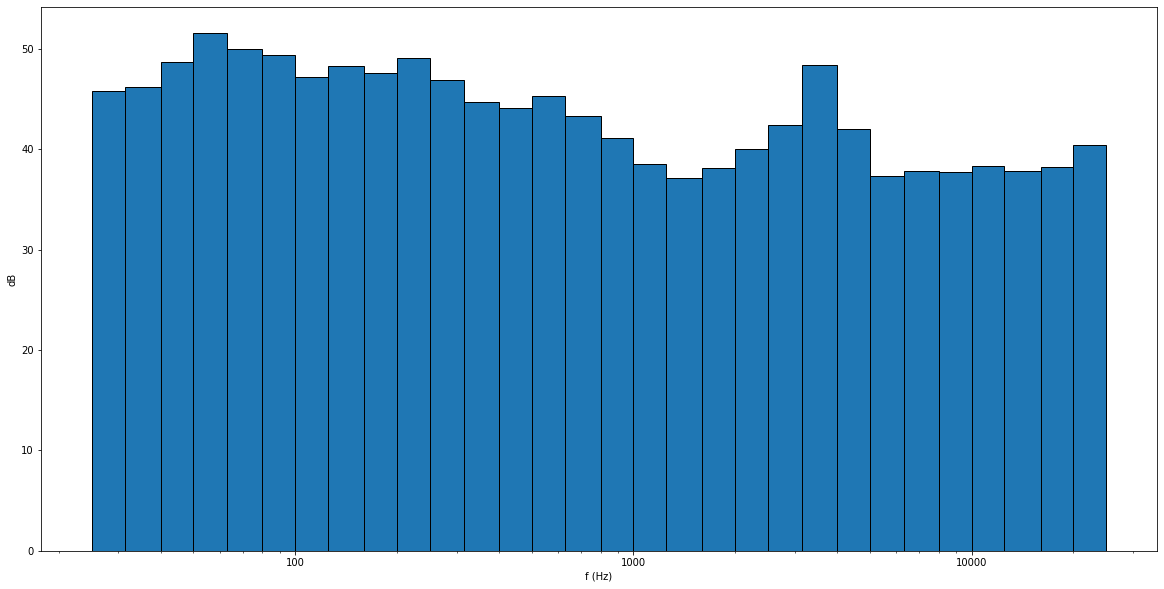

In [20]:
fig, ax = plt.subplots()

ax.bar(f, Oct_Leq, width=[f[j+1]-f[j] for j in range(len(f)-1)] + [5000],ec="k", align="edge")
ax.set_xscale("log")
fig.set_size_inches(20,10)
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.set_xlabel('f (Hz)')
ax.set_ylabel('dB')
plt.show()

## Ponderaciones A y C

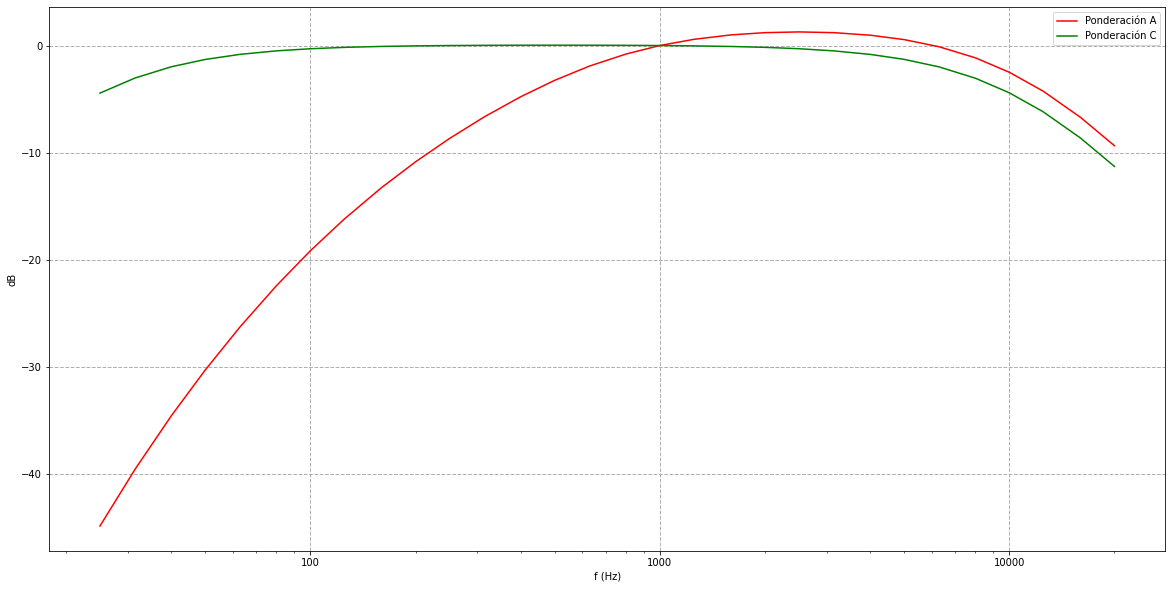

In [21]:
fig, ax = plt.subplots()

ax.plot(f, [ ponderacion_dB(n) for n in f ], 'r', label='Ponderación A')
ax.plot(f, [ ponderacion_dB(n,"C") for n in f ], 'g', label='Ponderación C')
ax.grid(linestyle='--', linewidth=1)
ax.set_xscale("log")
fig.set_size_inches(20,10)
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.legend(loc='upper right')
ax.set_xlabel('f (Hz)')
ax.set_ylabel('dB')
plt.show()

## Calculo del nivel de preción 

Se calculara tanto para nuestros datos como a los calculos con respecto a las ponderaciones.

In [22]:
Lp = 10 * math.log10(sum([ pow(10,i/10) for i in Oct_Leq]))
display(Markdown('$$ \\mathtt{L}_{p} =10 \\log\\left({ \\sum_{i=0}^\\infty 10^{\\frac{\\mathtt{L}_{pi}}{10}}}\\right) = {'+str(Leq)+ '} $$'))

$$ \mathtt{L}_{p} =10 \log\left({ \sum_{i=0}^\infty 10^{\frac{\mathtt{L}_{pi}}{10}}}\right) = {60.46704270151846} $$

In [23]:
LpA = 10 * math.log10(sum([ pow(10,(float(i['1/3 Oct Leq']) + ponderacion_dB(float(i['Freuencia'])))/10) for i in data2]))
display(Markdown('$$ \\mathtt{L}_{pa} =10 \\log\\left({ \\sum_{i=0}^\\infty 10^{\\frac{\\mathtt{L}_{pi} + CFA}{10}}}\\right) = {'+str(LpA)+ '} $$'))

$$ \mathtt{L}_{pa} =10 \log\left({ \sum_{i=0}^\infty 10^{\frac{\mathtt{L}_{pi} + CFA}{10}}}\right) = {54.30660138666787} $$

In [24]:
LpA = 10 * math.log10(sum([ pow(10,(float(i['1/3 Oct Leq']) + ponderacion_dB(float(i['Freuencia']), "C"))/10) for i in data2]))
display(Markdown('$$ \\mathtt{L}_{pc} =10 \\log\\left({ \\sum_{i=0}^\\infty 10^{\\frac{\\mathtt{L}_{pi} + CFC}{10}}}\\right) = {'+str(LpA)+ '} $$'))

$$ \mathtt{L}_{pc} =10 \log\left({ \sum_{i=0}^\infty 10^{\frac{\mathtt{L}_{pi} + CFC}{10}}}\right) = {59.58799040126557} $$

Con lo anterior se podria interpretar como un ruido tonal en los 3150 Hz tiene una diferencia de más de 5dB y también un ruido de baja frequencia por tener un realce, donde los Lp dan muy cercanos. Y con la grafica que se sostiene un nivel promedio en todos los datos. Y se podria relacionar con maquinas rotativas que alteran una amplia gama de frequencias.

## Conclosiones

<ul>
    <li>Se pudo lograr dar solución a los puntos dados por la guía del laboratorio, permitiendo entender mas a fondo de como se comportaria un ruido a partir de los datos obtenidos. </li>
    <li>Se pudo dar una posible descripción de cada uno de los ejemplos dados, obssrvendo los datos y sus respectivas graficas. </li>
    <li>Al hacer el uso de las ecuaciones, se puede verificar sus sentido al compararlas con el análisis de los datos.</li>
</ul>